In [1]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load dataset
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#Data types of variable
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
#The first image as an array
index = 0
x_train[index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

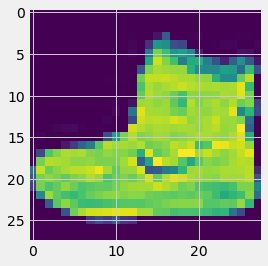

In [6]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [7]:
#Image label
print('The image label is:', y_train[index])

The image label is: 9


In [8]:
#Convert the labels into a set of 10 numbers to input the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
#Print new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
#Normalize the pixels to be values between o and 1
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[index]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(10, activation='softmax')
    ])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 128)       5

In [18]:
#Train the model
model.fit(x_train, y_train_one_hot, epochs=10, verbose=1, batch_size = 32, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 353s 222ms/step - loss: 0.5598 - accuracy: 0.8028 - val_loss: 0.3619 - val_accuracy: 0.8720
Epoch 2/10
1500/1500 [==============================] - 332s 221ms/step - loss: 0.2815 - accuracy: 0.8964 - val_loss: 0.2951 - val_accuracy: 0.8906
Epoch 3/10
1500/1500 [==============================] - 332s 222ms/step - loss: 0.2337 - accuracy: 0.9145 - val_loss: 0.2490 - val_accuracy: 0.9118
Epoch 4/10
1500/1500 [==============================] - 334s 223ms/step - loss: 0.2006 - accuracy: 0.9257 - val_loss: 0.2419 - val_accuracy: 0.9136
Epoch 5/10
1500/1500 [==============================] - 333s 222ms/step - loss: 0.1727 - accuracy: 0.9364 - val_loss: 0.4247 - val_accuracy: 0.8627
Epoch 6/10
1500/1500 [==============================] - 333s 222ms/step - loss: 0.1538 - accuracy: 0.9439 - val_loss: 0.2231 - val_accuracy: 0.9195
Epoch 7/10
1500/1500 [==============================] - 333s 222ms/step - loss: 0.1265 - accuracy: 0.9532 - val_

In [19]:
#Evaluate the model
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 14s 44ms/step - loss: 0.2967 - accuracy: 0.9195


0.9194999933242798

In [23]:
model.save('final_model.h5')

In [31]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img


In [45]:
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_test.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict_classes(img)
    

    
    return int(result[0])

In [46]:
final = run_example()

In [47]:
if final == 0:
        print("T-shirt/top")
elif final == 1:
        print("Trouser")
elif final == 2:
        print("Pullover")
elif final == 3:
        print("Dress")
elif final == 4:
        print("Coat")
elif final == 5:
        print("Sandal")
elif final == 6:
        print("Shirt")
elif final == 7:
        print("Sneaker")
elif final == 8:
        print("Bag")
elif final == 9:
        print("Ankle Boot")
else:
    print("No Categorized")

Pullover


In [48]:
classes = np.array(train.columns[2:])
proba = model.predict(img)
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

NameError: name 'train' is not defined

In [52]:

img = load_image('sample_test.png')
model = load_model('final_model.h5')
result = model.predict(img)
    
print(result)

[[6.73429932e-12 1.18516069e-16 9.99999046e-01 1.02423715e-14
  5.32306244e-09 4.72536134e-21 9.66902007e-07 4.99346586e-23
  8.43459196e-17 2.55760164e-24]]


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()